In [38]:
import modin.pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random


In [39]:
df = pd.read_csv('data/training.1600000.processed.noemoticon.csv', header=None, usecols=[0, 5], names=['target', 'text'])

In [40]:
# Sentiment별 데이터 분산
positive_df = df[df['target'] == 4]
negative_df = df[df['target'] == 0]

In [41]:
# 워드 클라우드 생성 함수 (랜덤 샘플링)
def generate_wordcloud(text_series, sentence_sample=10000, max_words=200, width=400, height=200, background_color='white'):
    # 1. 문장 랜덤 샘플링
    sampled_sentences = random.sample(list(text_series), min(len(text_series), sentence_sample))

    # 2. 샘플링된 문장 내의 모든 단어 추출
    words = " ".join(sampled_sentences).split()

     # 3. 단어 빈도 계산
    word_counts = WordCloud().process_text(" ".join(words))


    # 4. 상위 max_words 단어만 남기기
    filtered_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:max_words])

    # 5. 워드 클라우드 생성
    return WordCloud(width=width, height=height, background_color=background_color).generate_from_frequencies(filtered_word_counts)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# 워드 클라우드 생성 함수 (TF-IDF 기반 샘플링)
def generate_wordcloud_with_tfidf(text_series, tfidf_top_n=500, max_words=200, width=400, height=200, background_color='white'):
    # 1. TF-IDF 계산 (상위 500개의 단어 추출)
    vectorizer = TfidfVectorizer(max_features=tfidf_top_n, stop_words='english')
    vectorizer.fit(text_series)
    tfidf_top_words = set(vectorizer.get_feature_names_out())
    
    # 2. 원본 텍스트에서 TF-IDF 단어의 빈도 계산
    words = " ".join(text_series).split()
    filtered_words = [word for word in words if word in tfidf_top_words]  # TF-IDF 상위 단어만 필터링
    word_counts = Counter(filtered_words)  # 단어 빈도 계산

    # 3. 빈도 상위 200개 단어 선택
    most_common_words = dict(word_counts.most_common(max_words))
    
    return WordCloud(width=width, height=height, background_color=background_color).generate(most_common_words)

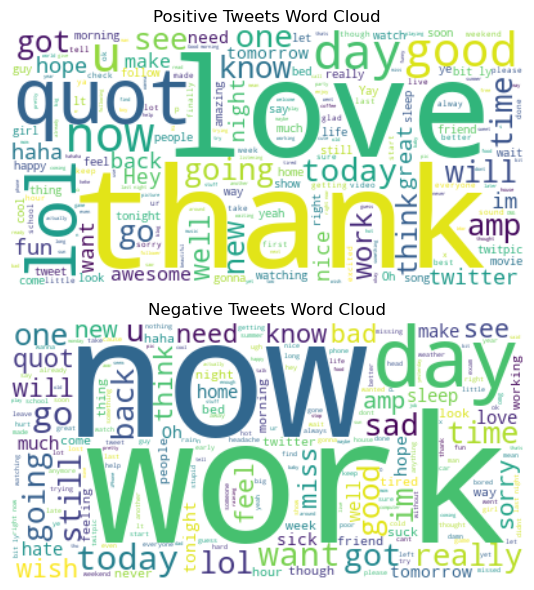

In [44]:
# Positive Word Cloud 생성
positive_wordcloud = generate_wordcloud(positive_df['text'], sentence_sample=10000, max_words=200)
# positive_wordcloud = generate_wordcloud_with_tfidf(positive_df['text'], max_words=200)

# Negative Word Cloud 생성
negative_wordcloud = generate_wordcloud(negative_df['text'], sentence_sample=10000, max_words=200)
# negative_wordcloud = generate_wordcloud_with_tfidf(negative_df['text'], max_words=200)

# Word Cloud 시각화
plt.figure(figsize=(6, 6))

# Positive Word Cloud
plt.subplot(2, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets Word Cloud")

# Negative Word Cloud
plt.subplot(2, 1, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets Word Cloud")

plt.tight_layout()
plt.show()